In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns = ['maydon', 'aholisi']
df.head()

,maydon,aholisi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0


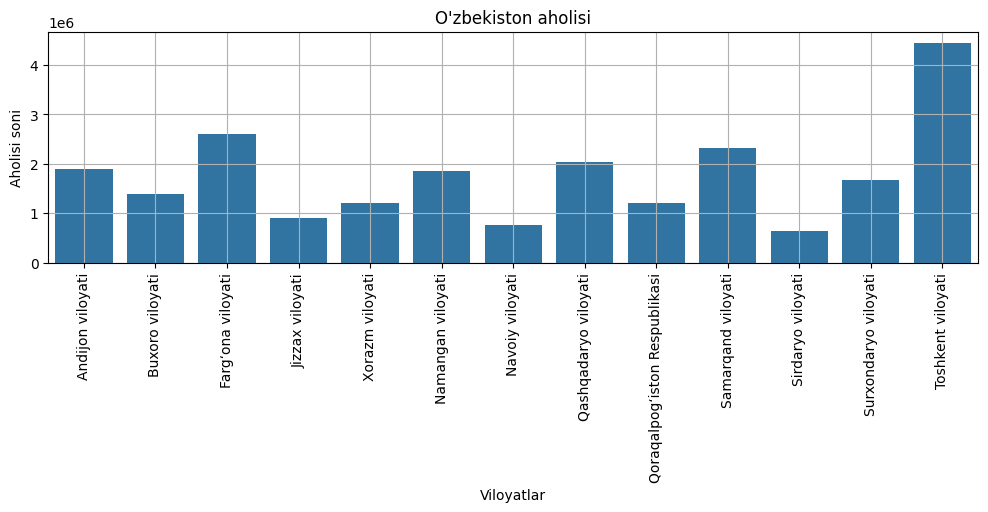

In [11]:
plt.figure(figsize=(12,3))
sns.barplot(x=df.index, y=df['aholisi'])
plt.title("O'zbekiston aholisi")
plt.xlabel("Viloyatlar")
plt.ylabel("Aholisi soni")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [15]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]
df.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [21]:
df = df.pivot_table(df, index=['month', 'year'])
df.head()

Avila Adobe
month year             
1     2014      24778.0
      2015      20438.0
      2016      19659.0
      2017      18792.0
      2018      16265.0

In [25]:
df = df.unstack(level=0)
df

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

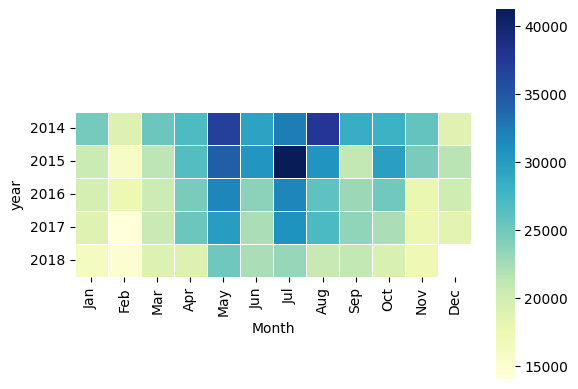

In [40]:
# plt.figure(figsize=(22,12))
sns.heatmap(data=df, cmap="YlGnBu", linewidth=0.5, square=True)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) +0.5, labels=xticks_labels)
plt.xlabel("Month")
plt.show()

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


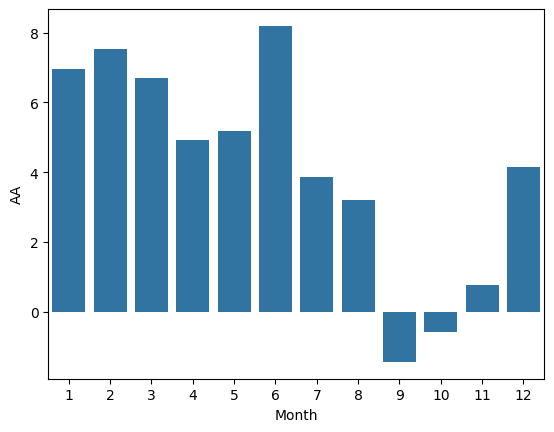

In [42]:
sns.barplot(x=df['Month'], y=df['AA'])
plt.show()

In [45]:
data = pd.melt(df, id_vars=["Month"], value_vars=['AA', 'MQ'])
data.head()

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878


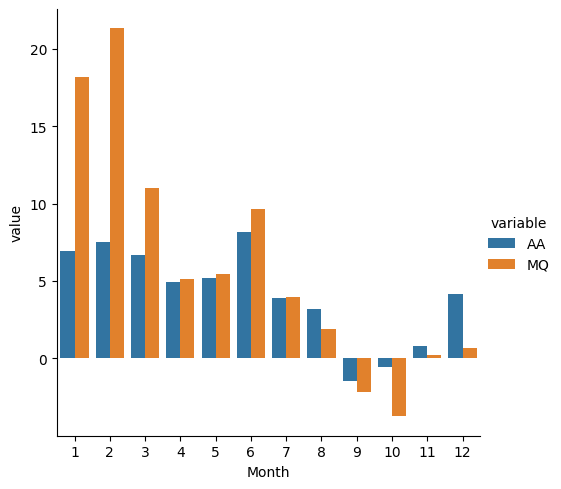

In [50]:
# plt.figure(figsize=(8,3))
sns.catplot(data=data, kind='bar', x='Month', y='value', hue='variable')
plt.show()

In [52]:
data1 = pd.melt(df, id_vars=['Month'], value_vars=['AA', 'AS', 'DL', 'WN', 'MQ'])
data1.sample(5)

,Month,variable,value
31,8,DL,0.653114
25,2,DL,5.614745
11,12,AA,4.149684
47,12,WN,6.720893
15,4,AS,-3.009003


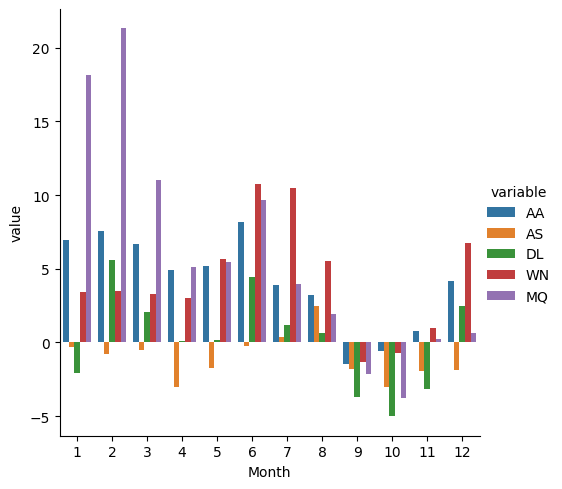

In [53]:
sns.catplot(data=data1, kind='bar', x='Month', y='value', hue='variable')
plt.show()

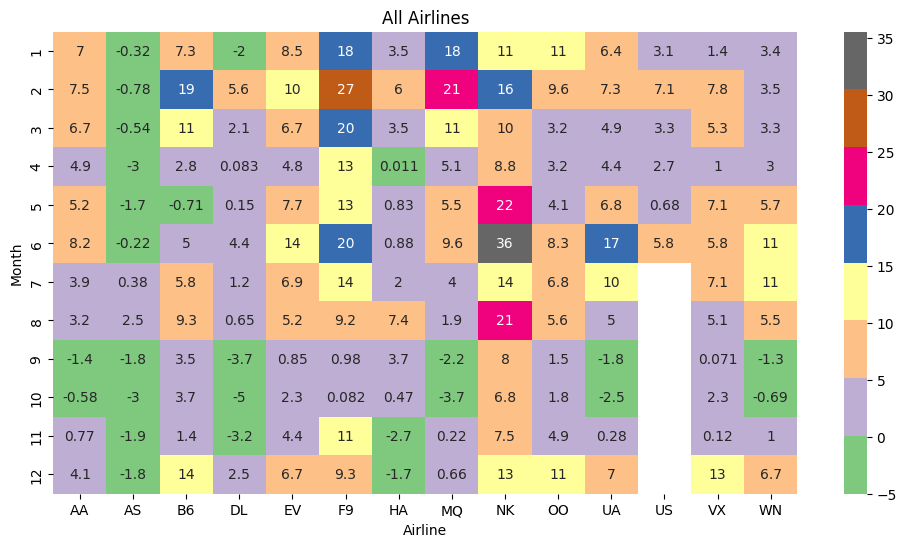

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.set_index('Month'), cmap='Accent', annot=True)
plt.title('All Airlines')
plt.xlabel("Airline")
plt.show()